# Dashboard

In [1]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats
from plotnine import *
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importando o dataset
df = pd.read_csv("previsaoreceita.csv", sep=';')

df

,customer_id,customer_acquisition_channel,year,week,net_revenue,gross_revenue,boxes
0,206461,Paid Marketing,2014,W09,71,71,2
1,462640,Paid Marketing,2015,W25,28,56,1
2,666461,Referral,2015,W50,40,40,1
3,183202,Referral,2013,W42,18,37,1
4,410993,Referral,2014,W29,0,37,1
...,...,...,...,...,...,...,...
715870,741230,Referral,2015,W51,0,40,1
715871,170503,Paid Marketing,2015,W25,9,37,1
715872,169910,Referral,2015,W04,37,37,1
715873,542301,Paid Marketing,2015,W11,56,56,1


In [3]:
# Inserindo a coluna "date" como datetime e corrigindo o formato

df['date'] = pd.to_datetime((df['year'].astype(str) + ' ' + df['week'] + " 1"), format="%Y W%W %w")
df.head()

,customer_id,customer_acquisition_channel,year,week,net_revenue,gross_revenue,boxes,date
0,206461,Paid Marketing,2014,W09,71,71,2,2014-03-03
1,462640,Paid Marketing,2015,W25,28,56,1,2015-06-22
2,666461,Referral,2015,W50,40,40,1,2015-12-14
3,183202,Referral,2013,W42,18,37,1,2013-10-21
4,410993,Referral,2014,W29,0,37,1,2014-07-21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715875 entries, 0 to 715874
Data columns (total 8 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   customer_id                   715875 non-null  int64         
 1   customer_acquisition_channel  715875 non-null  object        
 2   year                          715875 non-null  int64         
 3   week                          715875 non-null  object        
 4   net_revenue                   715875 non-null  int64         
 5   gross_revenue                 715875 non-null  int64         
 6   boxes                         715875 non-null  int64         
 7   date                          715875 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 43.7+ MB


In [5]:
# agrupando por data e somando os valores para total semanal

df_dashboard = df.groupby(by='date', as_index=False).sum()
df_dashboard.drop(columns=(['year', 'customer_id', 'boxes']), inplace=True)
df_dashboard.head()

,date,net_revenue,gross_revenue
0,2013-01-14,2310,4047
1,2013-01-21,12342,20296
2,2013-01-28,25807,35253
3,2013-02-04,35713,44641
4,2013-02-11,41898,52335


In [6]:
df_dashboard = df_dashboard[['date', 'gross_revenue', 'net_revenue']].set_index('date')
df_dashboard

,gross_revenue,net_revenue
date,,
2013-01-14,4047,2310
2013-01-21,20296,12342
2013-01-28,35253,25807
2013-02-04,44641,35713
2013-02-11,52335,41898
...,...,...
2015-11-30,286294,245756
2015-12-07,310562,265797
2015-12-14,295797,261247


In [7]:
df_dashboard.isna().sum()

gross_revenue    0
net_revenue      0
dtype: int64

In [8]:
df_dashboard.describe()

,gross_revenue,net_revenue
count,155.000000,155.000000
mean,191349.161290,168186.458065
std,65795.835986,58405.262689
min,4047.000000,2310.000000
25%,158289.000000,134519.500000
50%,207843.000000,182827.000000
75%,233300.500000,206546.500000
max,363693.000000,323891.000000


In [9]:
# Nível de densidade Leptocúrtica

df_dashboard.kurtosis()

gross_revenue    0.140999
net_revenue      0.183691
dtype: float64

In [10]:
# exibindo a variação para verificação da dispersão dos dados

df_dashboard['net_revenue'].var()

3411174709.7303715

In [11]:
df_dashboard['gross_revenue'].var()

4329092033.149147

In [12]:
# consultando o desvio padrão para analisar o quão os dados estão distantes da média

df_dashboard['net_revenue'].std()

58405.26268865137

In [13]:
df_dashboard['gross_revenue'].std()

65795.83598639922

## Resultado de vendas: Gross Revenue e Net Revenue

In [14]:
df_dashboard.sum()

gross_revenue    29659120
net_revenue      26068901
dtype: int64

## Maiores vendas

In [15]:
average_ticket = df.groupby(by=(['year', 'customer_acquisition_channel']), as_index=False).mean()
average_ticket.drop(columns=(['customer_id', 'net_revenue', 'boxes']), inplace=True)
average_ticket

,year,customer_acquisition_channel,gross_revenue
0,2013,Paid Marketing,42.076349
1,2013,Referral,39.821818
2,2014,Paid Marketing,41.347089
3,2014,Referral,39.619903
4,2015,Paid Marketing,42.039881
5,2015,Referral,40.728221


In [16]:
# Em 2013 o maior ticket médio foi de Paid Marketing com 42.076349 contra 39.821818 do Referral
# Em 2015 o maior ticket médio foi novamente de Paid Marketing com 42.039881 contra 40.728221 do Referral

average_ticket = average_ticket.drop(index=([2,3]))
average_ticket

,year,customer_acquisition_channel,gross_revenue
0,2013,Paid Marketing,42.076349
1,2013,Referral,39.821818
4,2015,Paid Marketing,42.039881
5,2015,Referral,40.728221


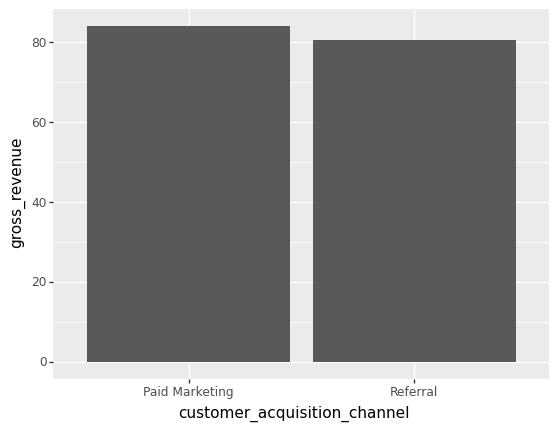

<ggplot: (36400234)>

In [17]:
(
    ggplot(average_ticket)
    + aes(x="customer_acquisition_channel", y="gross_revenue")
    + labs(
        x="customer_acquisition_channel",
        y="gross_revenue",
    )
    + geom_col()
)

## Número de clientes únicos por ano 2013x2015

In [18]:
unique_customers = df.groupby(by='year', as_index=False).nunique()
unique_customers.drop(columns=(['customer_acquisition_channel', 'week', 'net_revenue', 'boxes', 'date', 'gross_revenue']), inplace=True)

In [19]:
unique_customers = unique_customers.drop(index=(1))

In [20]:
# Em 2013 tivemos 35851 clientes únicos
# Em 2015 este número subiu para 51643

unique_customers

,year,customer_id
0,2013,35851
2,2015,51643


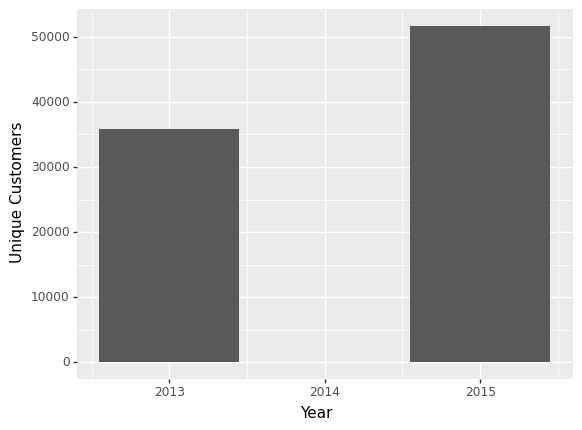

<ggplot: (33631754)>

In [21]:
(
    ggplot(unique_customers)
    + aes(x="year", y="customer_id")
    + labs(
        x="Year",
        y="Unique Customers",
    )
    + geom_col()
)

## Maiores compradores

In [22]:
biggest_buyers = df.groupby(by='customer_id').size()

In [23]:
biggest_buyers = biggest_buyers.sort_values(ascending=False)

In [24]:
biggest_buyers = biggest_buyers.head(10)
biggest_buyers = pd.DataFrame(biggest_buyers)
biggest_buyers

,0
customer_id,
69490,152
74972,150
84751,145
74011,144
75490,142
24772,142
74182,137
75153,137
93762,136


In [25]:
# Identificando os 10 maiores compradores para que a área de marketing possa fazer algum tipo de campanha.
# Da mesma forma, mas em sentido inverso, poderia ser feito o levantamento dos que compram menos.

data = [
    [69490, 152],
    [74972, 150],
    [84751, 145],
    [74011, 144],
    [75490, 142],
    [24772, 142],
    [74182, 137],
    [75153, 137],
    [93762, 136],
    [101602, 136]
]

# Converter a lista em um DataFrame
n_purchases = pd.DataFrame(data)

# Adicionar nomes de coluna aos cabeçalhos
n_purchases.columns = ['biggest_buyer', 'n_purchases']

# Exibir o DataFrame
n_purchases

,biggest_buyer,n_purchases
0,69490,152
1,74972,150
2,84751,145
3,74011,144
4,75490,142
5,24772,142
6,74182,137
7,75153,137
8,93762,136
9,101602,136


## Quantidade de vendas

In [26]:
amount_of_sales = df['customer_id'].count()
amount_of_sales

715875

## Total de clientes únicos

In [27]:
unique_customers = df['customer_id'].nunique()
unique_customers

118903

## Total de vendas 

In [28]:
total_of_sales = df['gross_revenue'].sum()
total_of_sales

29659120

## Organizando dataframe

In [29]:
biggest_buyers.head(1)

,0
customer_id,
69490,152


In [30]:
new_df = biggest_buyers.head(1)

In [31]:
new_df['Biggest Buy'] = biggest_buyers.head(1)

In [32]:
new_df['Total Of Sales'] = total_of_sales

In [33]:
new_df['Amount Of Sales'] = amount_of_sales

In [34]:
new_df['Total Profit'] = df['net_revenue'].sum()

In [35]:
new_df['Total Discounts'] = df['gross_revenue'].sum() - df['net_revenue'].sum()

In [36]:
new_df['Unique Customers'] = unique_customers

In [37]:
new_df = pd.DataFrame(new_df)

In [38]:
new_df.drop(columns=0, inplace=True)

In [39]:
new_df.index = ['Totals']

In [40]:
new_df.T

,Totals
Biggest Buy,152
Total Of Sales,29659120
Amount Of Sales,715875
Total Profit,26068901
Total Discounts,3590219
Unique Customers,118903


# Ridge Regression

In [41]:
# Importando as bibliotecas utilizadas no projeto

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from datetime import datetime
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from prophet import Prophet
from sklearn.model_selection import learning_curve
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm
import plotnine
from pmdarima.arima.utils import ndiffs
from sklearn.preprocessing import RobustScaler
import pmdarima as pm
import tensorflow as tf
import math
from matplotlib import rcParams

In [42]:
# Verificando o período que o dataset está apresentando

df_dashboard.head()

,gross_revenue,net_revenue
date,,
2013-01-14,4047,2310
2013-01-21,20296,12342
2013-01-28,35253,25807
2013-02-04,44641,35713
2013-02-11,52335,41898


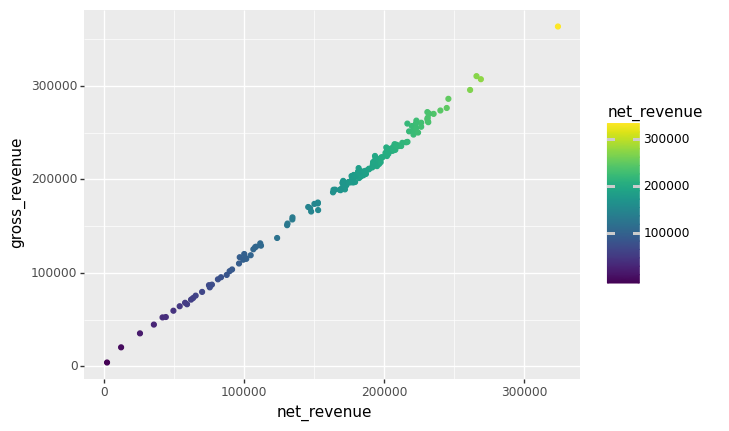

In [43]:
# Plotando gráfico de dispersão para avaliar a relação entre as features "gross_revenue" e "net_revenue"

plotnine.qplot(x='net_revenue', y='gross_revenue', data=df_dashboard, color='net_revenue').draw();

In [44]:
# Acrescenta uma linha vazia ao dataset para previsão de receita futura com base na passada. 

df_shift = df_dashboard[1:].shift(1)
df_shift.drop(columns='gross_revenue', inplace=True)

In [45]:
df_shift

,net_revenue
date,
2013-01-21,NaN
2013-01-28,12342.0
2013-02-04,25807.0
2013-02-11,35713.0
2013-02-18,41898.0
...,...
2015-11-30,222652.0
2015-12-07,245756.0
2015-12-14,265797.0


In [46]:
df_shift.dropna(inplace=True)

In [47]:
df_shift

,net_revenue
date,
2013-01-28,12342.0
2013-02-04,25807.0
2013-02-11,35713.0
2013-02-18,41898.0
2013-02-25,44234.0
...,...
2015-11-30,222652.0
2015-12-07,245756.0
2015-12-14,265797.0


In [48]:
# Vamos manter os últimos 30% do dataset para teste

train_size = 0.7
index = round(train_size*df_shift.shape[0])
df_train = df_shift.iloc[:index]
df_test = df_shift.iloc[index:]

In [49]:
df2 = df_shift.copy()
df2_train = df_train.copy()
df2_test = df_test.copy()

# Itera sobre o range de 1 a 6 (pois o último número é ignorado)
# da coluna "net_revenue", deslocando os dados para o futuro
# e armazenando em novas colunas, separando em treino e teste

# Construindo 6 features autoregressivas 

for i in range(1, 7):
    df2_train[f't - {i}'] = df_train.shift(i)
    df2_test[f't - {i}'] = df_test.shift(i)

df2_train.dropna(inplace=True)
df2_test.dropna(inplace=True)

df2_train.head()

,net_revenue,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6
date,,,,,,,
2013-03-11,54130.0,49658.0,44234.0,41898.0,35713.0,25807.0,12342.0
2013-03-18,59368.0,54130.0,49658.0,44234.0,41898.0,35713.0,25807.0
2013-03-25,57970.0,59368.0,54130.0,49658.0,44234.0,41898.0,35713.0
2013-04-01,63673.0,57970.0,59368.0,54130.0,49658.0,44234.0,41898.0
2013-04-08,65516.0,63673.0,57970.0,59368.0,54130.0,49658.0,44234.0


In [50]:
# Train Test Split
X2_train = df2_train.drop(columns = ['net_revenue'])
y2_train = df2_train['net_revenue']
X2_test = df2_test.drop(columns = ['net_revenue'])
y2_test = df2_test['net_revenue']

print(X2_train.shape,y2_train.shape, X2_test.shape,y2_test.shape)

(101, 6) (101,) (40, 6) (40,)


In [51]:
y2_train = pd.DataFrame(y2_train)

In [52]:
X2_train = np.log(X2_train)
X2_test = np.log(X2_test)
y2_train = np.log(y2_train)
y2_test = np.log(y2_test)

In [53]:
X2_train

,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6
date,,,,,,
2013-03-11,10.812915,10.697249,10.642993,10.483270,10.158401,9.420763
2013-03-18,10.899144,10.812915,10.697249,10.642993,10.483270,10.158401
2013-03-25,10.991511,10.899144,10.812915,10.697249,10.642993,10.483270
2013-04-01,10.967681,10.991511,10.899144,10.812915,10.697249,10.642993
2013-04-08,11.061516,10.967681,10.991511,10.899144,10.812915,10.697249
...,...,...,...,...,...,...
2015-01-12,11.724935,11.937304,12.179903,12.187517,12.084425,12.069095
2015-01-19,12.175990,11.724935,11.937304,12.179903,12.187517,12.084425
2015-01-26,12.171486,12.175990,11.724935,11.937304,12.179903,12.187517


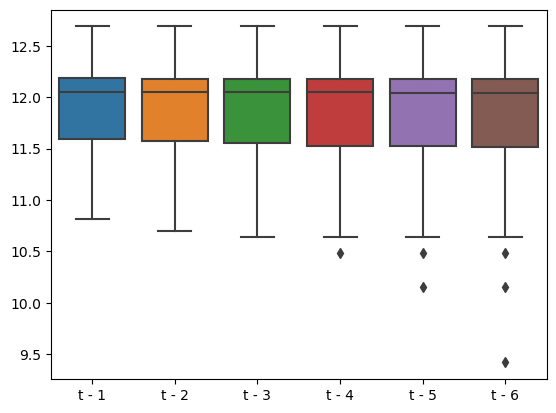

In [54]:
sns.boxplot(data = X2_train);

In [55]:
X2_train

,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6
date,,,,,,
2013-03-11,10.812915,10.697249,10.642993,10.483270,10.158401,9.420763
2013-03-18,10.899144,10.812915,10.697249,10.642993,10.483270,10.158401
2013-03-25,10.991511,10.899144,10.812915,10.697249,10.642993,10.483270
2013-04-01,10.967681,10.991511,10.899144,10.812915,10.697249,10.642993
2013-04-08,11.061516,10.967681,10.991511,10.899144,10.812915,10.697249
...,...,...,...,...,...,...
2015-01-12,11.724935,11.937304,12.179903,12.187517,12.084425,12.069095
2015-01-19,12.175990,11.724935,11.937304,12.179903,12.187517,12.084425
2015-01-26,12.171486,12.175990,11.724935,11.937304,12.179903,12.187517


In [56]:
X2_train.shape

(101, 6)

In [57]:
# Retirando os outliers do conjunto de treinamento

X2_train['t - 4'] = pd.DataFrame([X2_train['t - 4'][X2_train['t - 4'] > 10.49]]).T
X2_train['t - 5'] = pd.DataFrame([X2_train['t - 5'][X2_train['t - 5'] > 10.49]]).T
X2_train['t - 6'] = pd.DataFrame([X2_train['t - 6'][X2_train['t - 6'] > 10.49]]).T

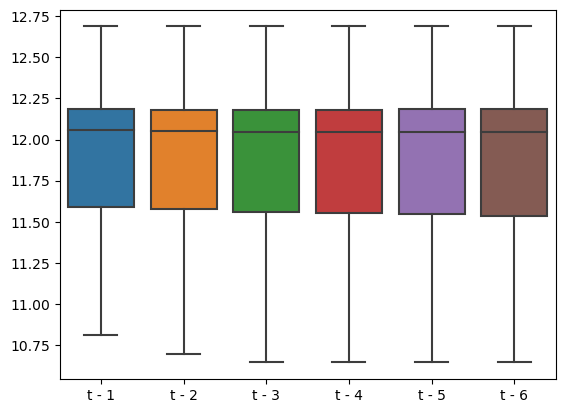

In [58]:
sns.boxplot(data = X2_train);

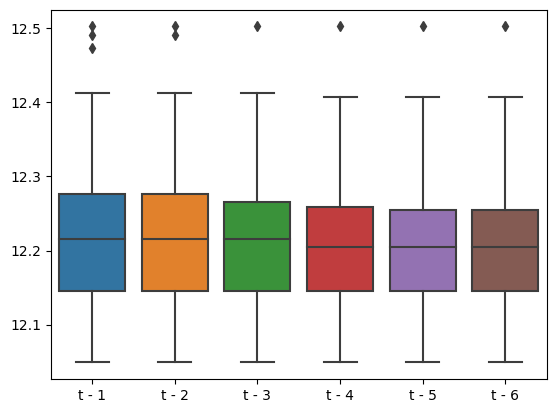

In [59]:
sns.boxplot(data = X2_test);

In [60]:
# Retirando os outliers do conjunto de teste

X2_test['t - 1'] = pd.DataFrame([X2_test['t - 1'][X2_test['t - 1'] < 12.4]]).T
X2_test['t - 2'] = pd.DataFrame([X2_test['t - 2'][X2_test['t - 2'] < 12.4]]).T
X2_test['t - 3'] = pd.DataFrame([X2_test['t - 3'][X2_test['t - 3'] < 12.4]]).T
X2_test['t - 4'] = pd.DataFrame([X2_test['t - 4'][X2_test['t - 4'] < 12.4]]).T
X2_test['t - 5'] = pd.DataFrame([X2_test['t - 5'][X2_test['t - 5'] < 12.4]]).T
X2_test['t - 6'] = pd.DataFrame([X2_test['t - 6'][X2_test['t - 6'] < 12.4]]).T

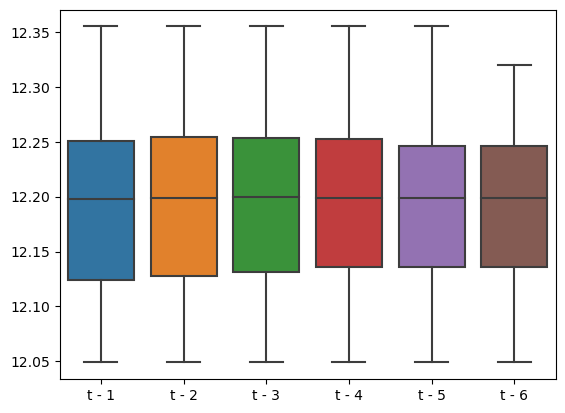

In [61]:
# Verificando os dados sem os outliers

sns.boxplot(data = X2_test);

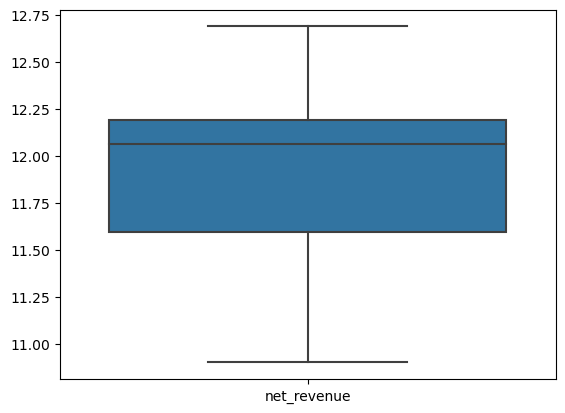

In [62]:
sns.boxplot(data = y2_train);

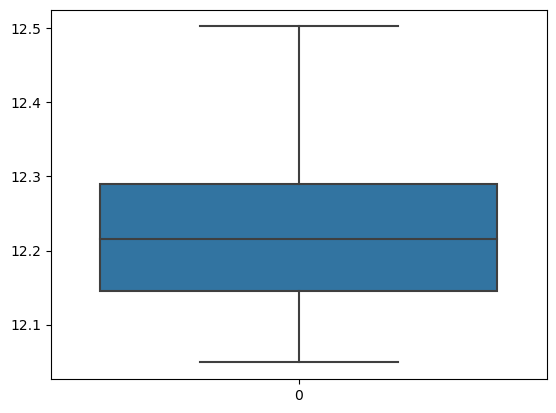

In [63]:
sns.boxplot(data = y2_test);

In [64]:
# Após a remoção dos outliers, o conjunto de treinamento apresentou alguns dados ausentes

X2_train.isna().sum()

t - 1    0
t - 2    0
t - 3    0
t - 4    1
t - 5    2
t - 6    3
dtype: int64

In [65]:
# Substituindo os valores ausentes pela mediana do conjunto de treinamento

X2_train.fillna(X2_train['t - 4'].dropna().median(), inplace=True)
X2_train.fillna(X2_train['t - 5'].dropna().median(), inplace=True)
X2_train.fillna(X2_train['t - 6'].dropna().median(), inplace=True)

In [66]:
# Verificando a ausência de outliers no conjunto de treinamento após a substituição

X2_train.isna().sum()

t - 1    0
t - 2    0
t - 3    0
t - 4    0
t - 5    0
t - 6    0
dtype: int64

In [67]:
# Verificando outliers no conjunto de teste

X2_test.isna().sum()

t - 1    5
t - 2    4
t - 3    3
t - 4    2
t - 5    2
t - 6    2
dtype: int64

In [68]:
# Substituindo os valores ausentes pela mediana do conjunto de teste

X2_test.fillna(X2_test['t - 1'].dropna().median(), inplace=True)
X2_test.fillna(X2_test['t - 2'].dropna().median(), inplace=True)
X2_test.fillna(X2_test['t - 3'].dropna().median(), inplace=True)
X2_test.fillna(X2_test['t - 4'].dropna().median(), inplace=True)
X2_test.fillna(X2_test['t - 5'].dropna().median(), inplace=True)
X2_test.fillna(X2_test['t - 6'].dropna().median(), inplace=True)

In [69]:
# Verificando a ausência de outliers no conjunto de teste após a substituição

X2_test.isna().sum()

t - 1    0
t - 2    0
t - 3    0
t - 4    0
t - 5    0
t - 6    0
dtype: int64

In [70]:
# Regressão Ridge para evitar o overffiting e Outliers 

from sklearn.linear_model import Ridge

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X2_train)
X_test_scaled = scaler.transform(X2_test)

ridge = Ridge(alpha=1).fit(X_train_scaled, y2_train)

In [71]:
# Fazendo previsões com o modelo treinado
ridge_pred = ridge.predict(X_test_scaled)

# Avaliando o modelo
ridge_mape = mean_absolute_percentage_error(y2_test, ridge_pred)

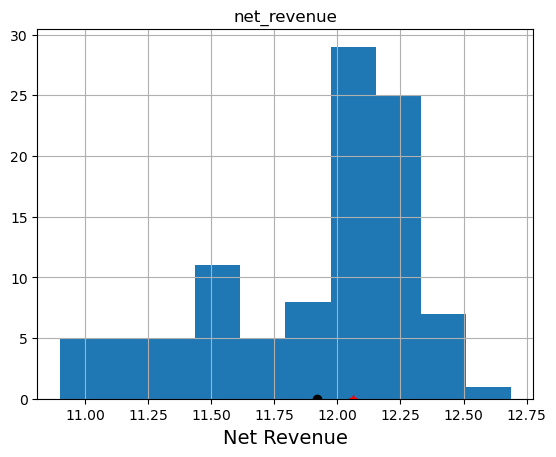

In [72]:
# Plota um histograma com a média em vermelho e a mediana em preto

nome = 'Net Revenue'
name = 'Gross Revenue'
y2_train.hist()

plt.xlabel(nome, size=14)

# Média, mediana
plt.plot(y2_train.median(),0, '*r')
plt.plot(y2_train.mean(), 0, 'ok')
plt.show()

## Análise de Resíduos - Ridge

In [73]:
ridge_resid = y2_test.values - ridge_pred[0]

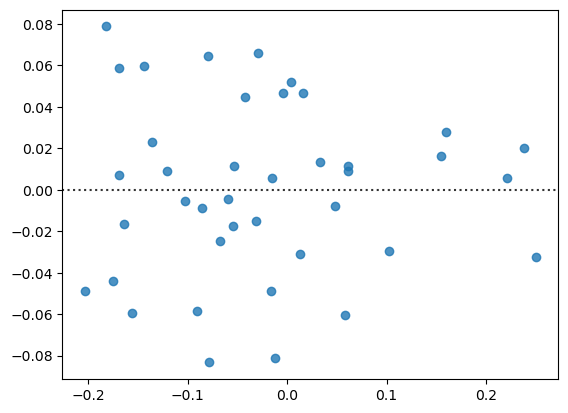

In [74]:
# Plot dos resíduos x valores previstos. Como esperado, valores distribuídos aleatoriamente e em torno de zero. 

sns.residplot(ridge_resid, ridge_pred);

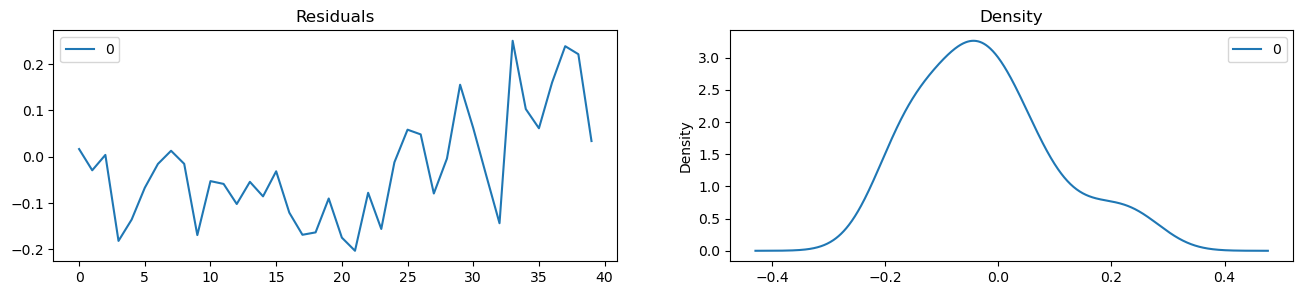

In [75]:
ridge_resid = pd.DataFrame(ridge_resid)

fig, ax = plt.subplots(1,2, figsize=(16,3))
ridge_resid.plot(title="Residuals", ax=ax[0])
ridge_resid.plot(kind='kde', title='Density', ax=ax[1]);

In [76]:
# Teste de variância: Homoscedasticidade identificada através do valor p > 0.05

from statsmodels.stats.diagnostic import het_goldfeldquandt

statistics, p_valor, indexes = het_goldfeldquandt(ridge_resid[0],  X_test_scaled)

print("Test statistics:", statistics)
print("Valor-P:", p_valor)

Test statistics: 3.174302905611655
Valor-P: 0.019281747416243382


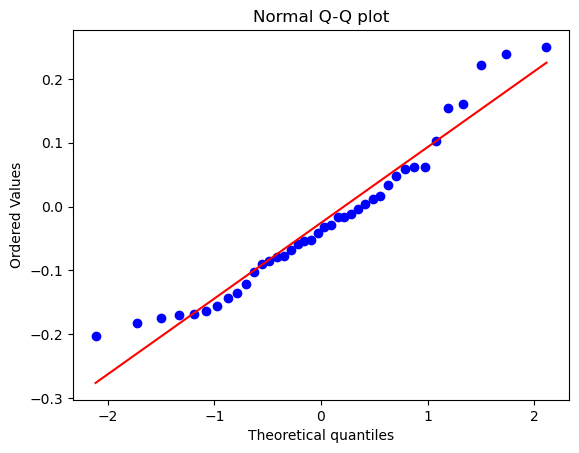

In [77]:
# Avaliando os resíduos e confirmando que trata-se de uma distribuição normal dos resíduos

import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(ridge_resid[0], dist='norm', plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [78]:
# Evidências de uma distribuição Gaussiana, p-value muito maior que 0.05

from statsmodels.stats.diagnostic import lilliefors

lilliefors(ridge_resid[0], dist='norm')

(0.08646946355874652, 0.6256441292497827)

In [79]:
# Como esperado, a média dos resíduos está em 0

ridge_resid[0].mean()

-0.02537096986250966

In [80]:
# Teste de auto-correlação: Valor de auto-correlação considerado normal (entre 1.5 e 2.5)

from statsmodels.stats.stattools import durbin_watson

durbin_watson(ridge_resid[0], axis=0)

0.8334638556056004

In [81]:
model = sm.OLS(y2_train, X_train_scaled)
result = model.fit()

influence = result.get_influence()
distance_cook = influence.cooks_distance[0]
leverage = influence.hat_matrix_diag
student_residue = influence.resid_studentized_external

# Imprime as medidas de influência
print("Distance Cook:", distance_cook)
print("Leverage:", leverage)
print("Student Residue:", student_residue)

Distance Cook: [3.48157308e-01 9.40754794e-02 1.20262285e-02 2.30937047e-04
 2.24191759e-05 2.04345089e-07 1.59878146e-04 1.95199451e-04
 1.24944855e-04 2.66002979e-04 5.09853230e-04 4.71130250e-04
 7.02100933e-04 9.61878209e-04 9.84006687e-04 1.10360548e-03
 8.47648880e-04 8.87040039e-04 1.03177473e-03 1.09493416e-03
 1.10340377e-03 1.71029999e-03 1.84188847e-03 1.37054934e-03
 9.58261751e-04 8.53153062e-04 9.78445934e-04 9.83976982e-04
 1.46518408e-03 1.47434132e-03 1.27093528e-03 1.35390634e-03
 1.38392252e-03 9.17715186e-04 7.12959651e-04 6.18254584e-04
 5.83872467e-04 6.64060289e-04 9.59178818e-04 1.27713547e-03
 9.93908092e-04 7.30303772e-04 3.91707497e-04 2.34221448e-04
 1.08314454e-01 3.96745025e-01 3.06858747e-01 1.78906055e-01
 1.48827138e-01 1.61622683e-01 1.66419488e-02 1.47675427e-03
 1.90817789e-03 2.02351005e-03 3.19504979e-03 2.47933623e-03
 4.20407015e-03 4.32831508e-03 4.37139446e-03 6.34154297e-03
 4.09181835e-03 2.37132238e-03 3.77573887e-03 2.98427289e-03
 4.546488

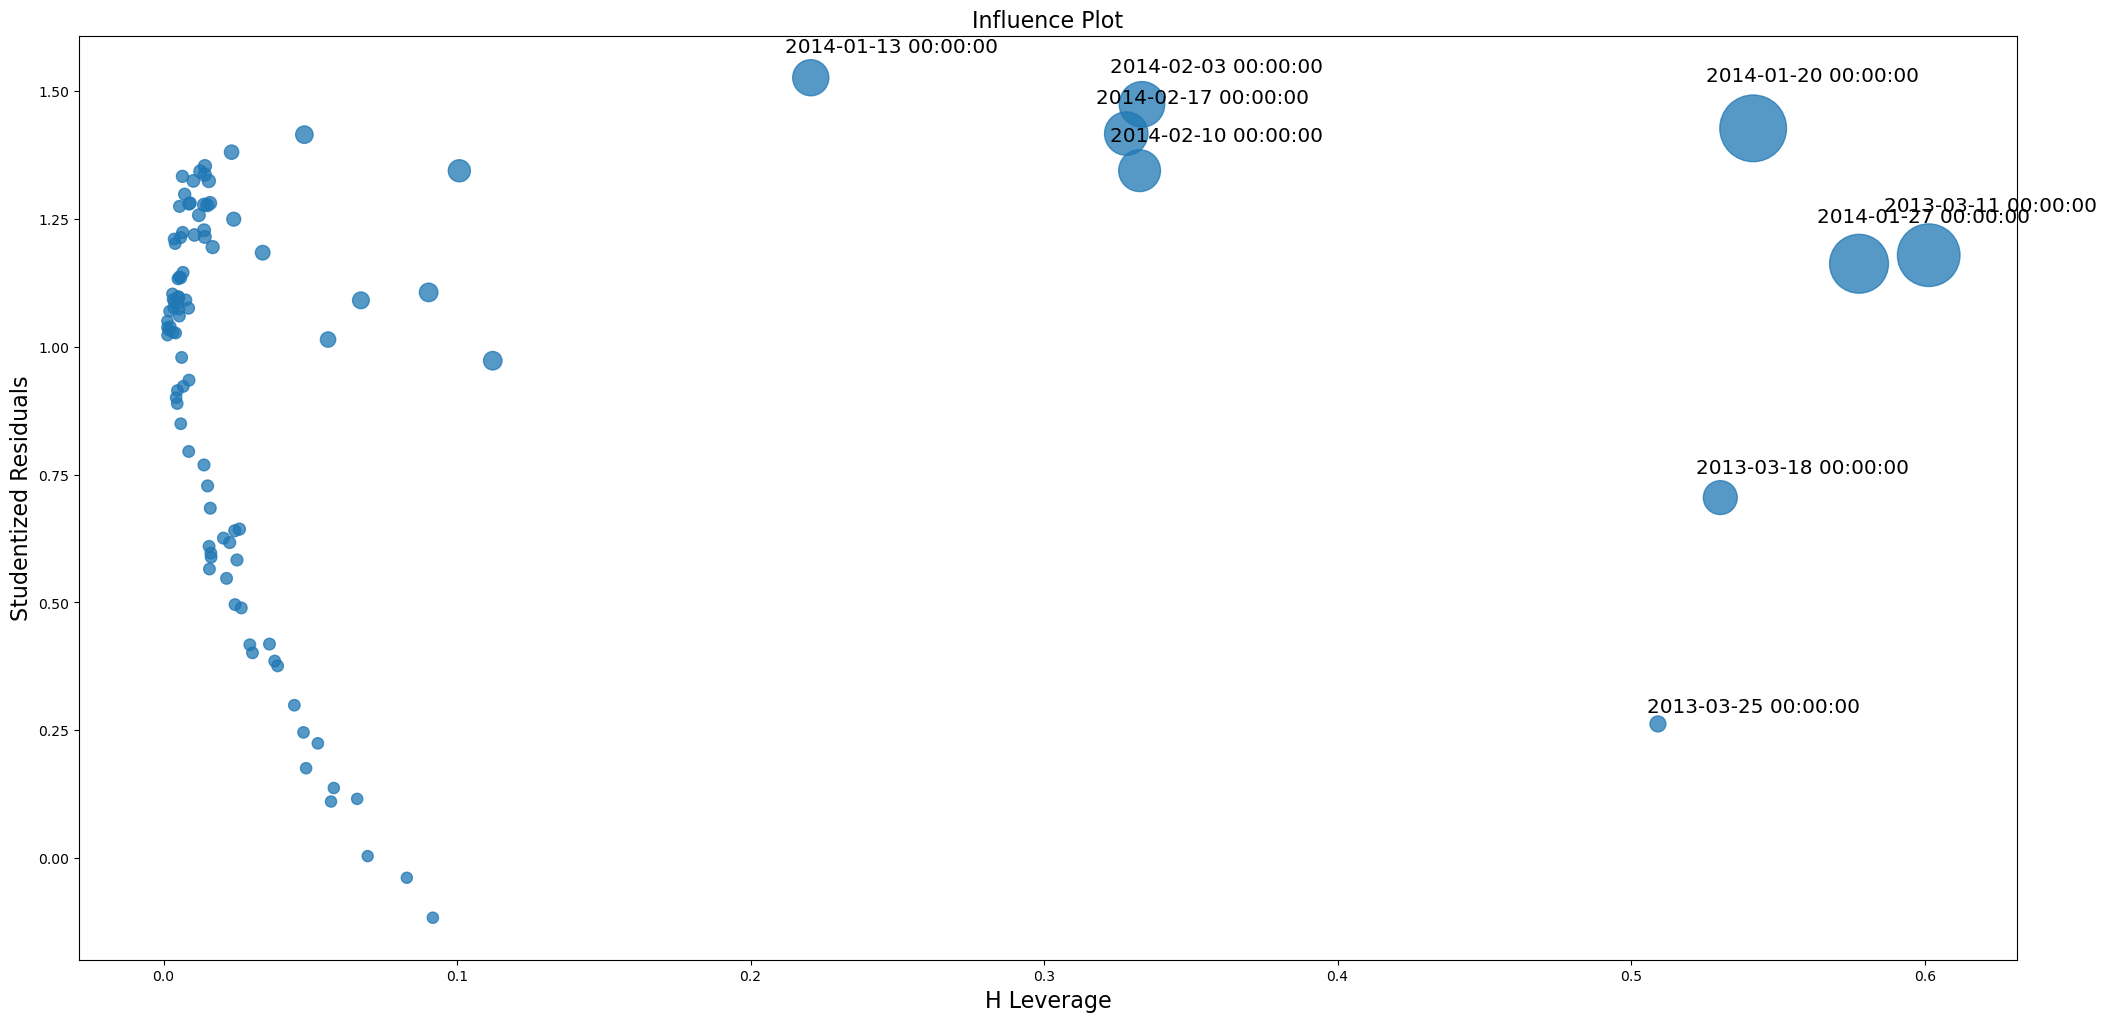

In [82]:
fig, ax = plt.subplots(figsize=(25,12))
fig = sm.graphics.influence_plot(result, ax=ax, criterion="cook")

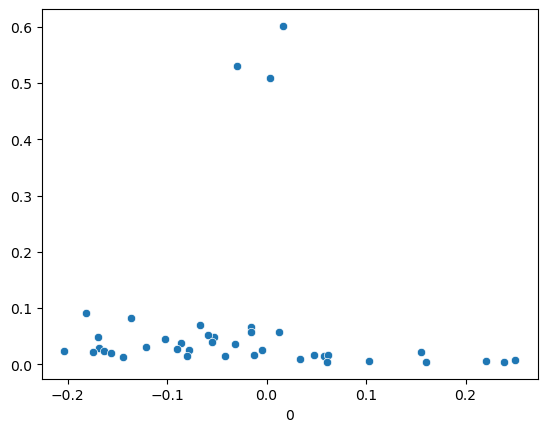

In [83]:
# Efeito alavanca detectado

sns.scatterplot(ridge_resid[0], leverage[:40]);

In [84]:
df_dashboard.shape, leverage.shape, ridge_resid.shape

((155, 2), (101,), (40, 1))

In [85]:
# Modelo Ridge impreciso, não deve ser utilizado para produção

# Huber Regressor

In [86]:
# Huber Regressor menos sensível a valores atípicos e efeito alavanca

from sklearn.linear_model import HuberRegressor

huber = HuberRegressor(epsilon=6).fit(X_train_scaled, y2_train)

In [87]:
huber_pred = huber.predict(X_test_scaled)

In [88]:
huber_resid = y2_test.values - huber_pred

In [89]:
huber_mape = mean_absolute_percentage_error(y2_test, huber_pred)

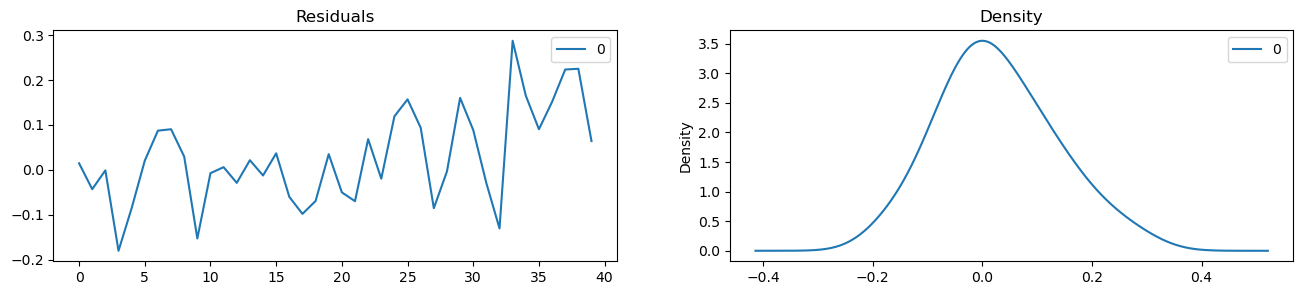

In [90]:
huber_resid = pd.DataFrame(huber_resid)

fig, ax = plt.subplots(1,2, figsize=(16,3))
huber_resid.plot(title="Residuals", ax=ax[0])
huber_resid.plot(kind='kde', title='Density', ax=ax[1]);

In [91]:
last_months = X_test_scaled[-24:] # Separando os últimos seis meses para previsão dos seis meses futuros

forecast_months = huber.predict(last_months) # Prevendo os próximos seis meses

In [92]:
last_months = X_test_scaled[-24:]
forecast_months = huber.predict(last_months)

# Printa a receita prevista
print("Previsão de receita a cada semana para os próximos seis meses:")
for i in range(len(forecast_months)):
    print(f"Week {i+1}: {forecast_months[i]}")

Previsão de receita a cada semana para os próximos seis meses:
Week 1: 12.191384062848359
Week 2: 12.181504042481174
Week 3: 12.158020892355802
Week 4: 12.126934811258023
Week 5: 12.12752392462961
Week 6: 12.118767160856317
Week 7: 12.105873347249657
Week 8: 12.115795171572447
Week 9: 12.120891694791368
Week 10: 12.153486611139598
Week 11: 12.206388426242627
Week 12: 12.25803260266205
Week 13: 12.251472235085657
Week 14: 12.247252853626167
Week 15: 12.225259340840617
Week 16: 12.240156619615496
Week 17: 12.238766071877698
Week 18: 12.214970347197948
Week 19: 12.18978659513612
Week 20: 12.223047327488947
Week 21: 12.26085772557995
Week 22: 12.267203680090619
Week 23: 12.24834529478049
Week 24: 12.221756350718206


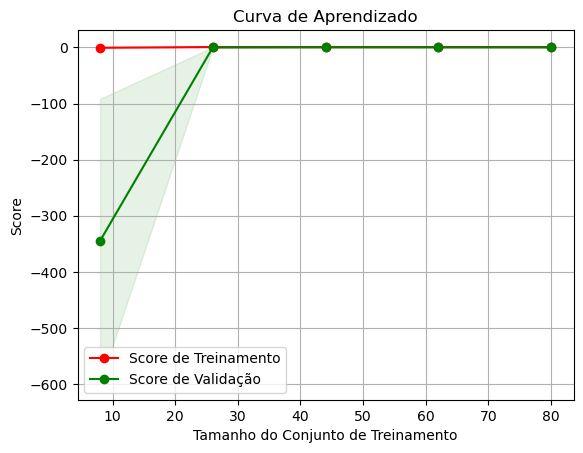

In [93]:
from sklearn.model_selection import learning_curve

X, y = X_train_scaled, y2_train

# Definir o modelo de aprendizado de máquina
model = HuberRegressor()

# Gerar as curvas de aprendizado
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# Calcular as médias e desvios padrão dos scores de treinamento e validação
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotar as curvas de aprendizado
plt.figure()
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Score de Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Score de Validação")
plt.legend(loc="best")
plt.show()

## Análise de Resíduos - Huber Regression

In [94]:
df_dashboard.shape, huber_pred.shape, huber_resid.shape

((155, 2), (40,), (40, 1))

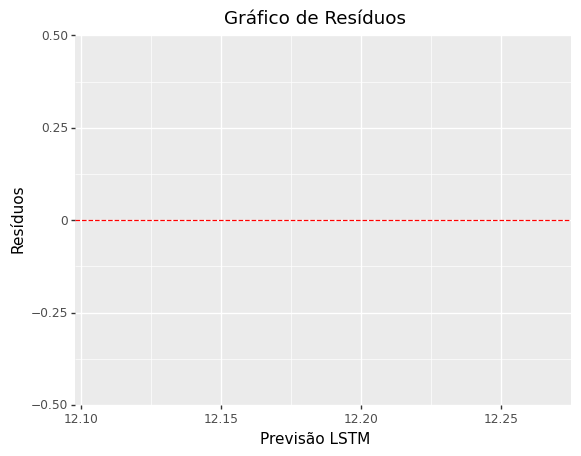

<ggplot: (51447206)>

In [95]:
(ggplot(df_dashboard[115:])
 + geom_point(aes(x=huber_pred, y=huber_resid), size=3)
 + geom_hline(yintercept=0, linetype='dashed', color='red')
 + labs(x='Previsão LSTM', y='Resíduos', title='Gráfico de Resíduos'))

In [96]:
# Problema de HETEROSCEDASTICIDADE

statistics, p_value, indexes = het_goldfeldquandt(huber_resid, X_test_scaled)

print("Test statistics:", statistics)
print("Value-P:", p_value)

Test statistics: 2.736789207952476
Value-P: 0.03484620418158454


In [97]:
leverage.shape, huber_resid.shape

((101,), (40, 1))

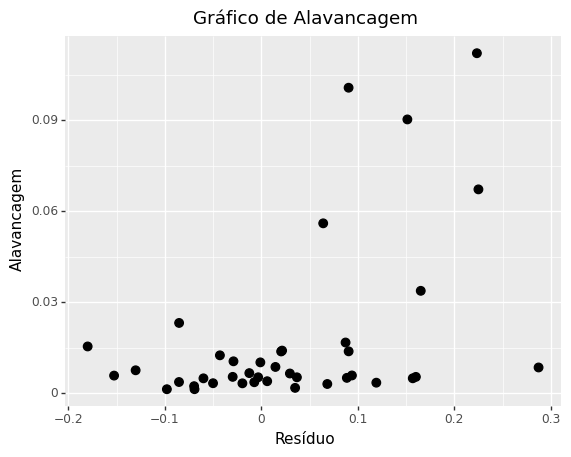

<ggplot: (52114938)>

In [98]:
(ggplot() +
 aes(x=huber_resid, y=leverage[61:]) +
 geom_point(size=3) +
 labs(x="Resíduo", y="Alavancagem", title="Gráfico de Alavancagem"))

In [99]:
# Mesmo problema do Ridge com HETEROSCEDASTICIDADE

statistics, p_value, indexes = het_goldfeldquandt(huber_resid, X_test_scaled)

print("Test statistics:", statistics)
print("Value-P:", p_value)

Test statistics: 2.736789207952476
Value-P: 0.03484620418158454


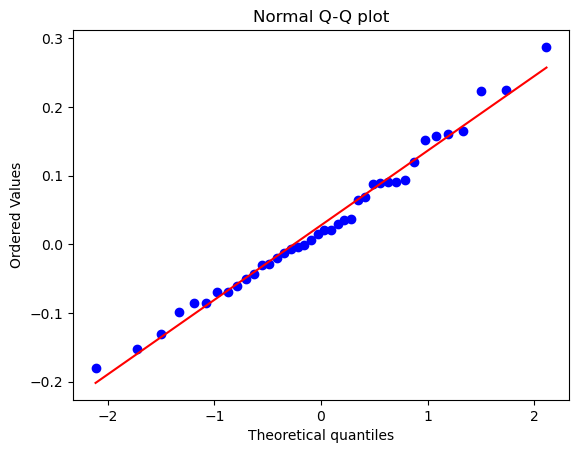

In [100]:
stats.probplot(huber_resid[0], dist='norm', plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [101]:
# Modelo Huber impreciso, não deve ser utilizado para produção

# ARIMA

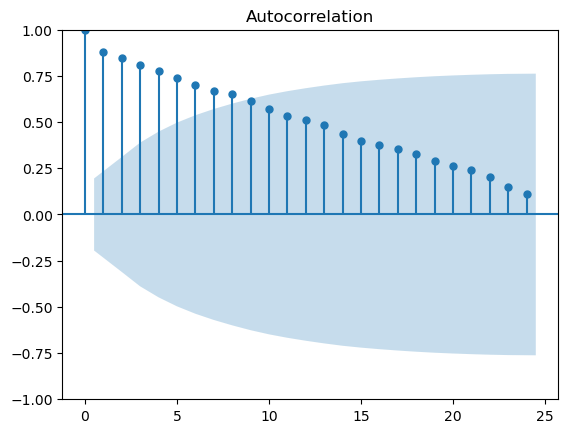

In [102]:
# Medindo os efeitos indiretos de cada semana nos ultimos seis meses.

plot_acf(y2_train, lags=24);

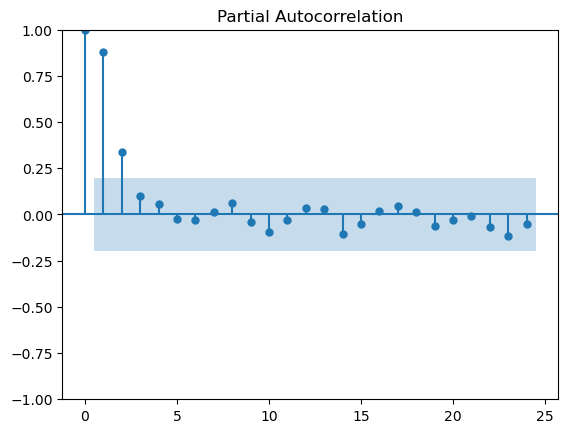

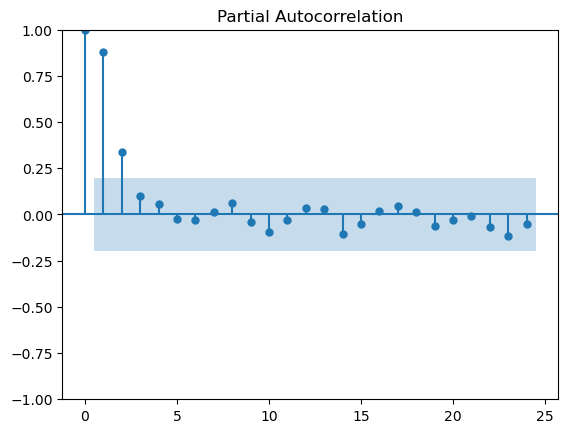

In [103]:
# Medindo a correlação direta de seis meses atrás,
# para saber quantas semanas passadas tem impacto significante
# na previsão.

plot_pacf(y2_train, ax=None, lags=24, alpha=0.05, method='ywm', use_vlines=True, title='Partial Autocorrelation', zero=True, vlines_kwargs=None)

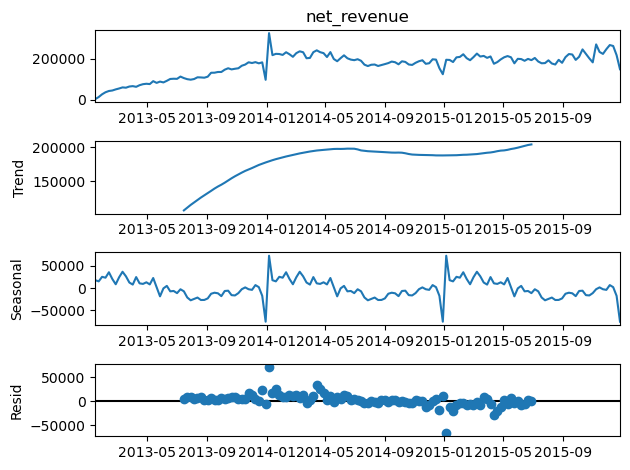

In [104]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposição aditiva dos dados

result_add = seasonal_decompose(df_dashboard['net_revenue'], model='additive')
result_add.plot();

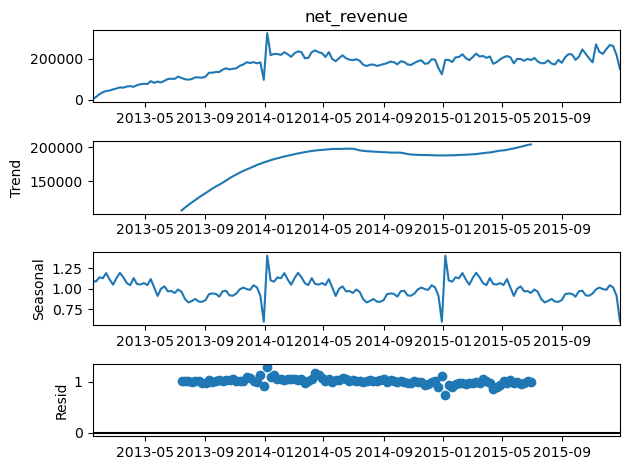

In [105]:
# Decomposição multiplicativa dos dados

result_mul = seasonal_decompose(df_dashboard['net_revenue'], model='multiplicative')
result_mul.plot();

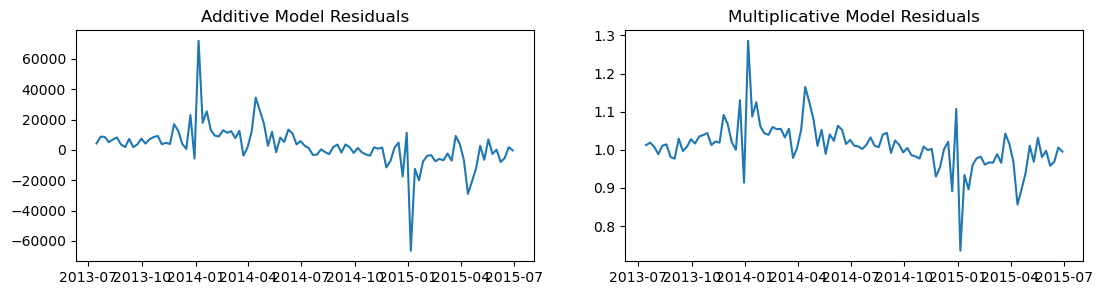

In [106]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(13,3))
ax1.plot(result_add.resid); ax1.set_title("Additive Model Residuals")
ax2.plot(result_mul.resid); ax2.set_title("Multiplicative Model Residuals");

In [107]:
# p-value > que 0.05 indica que a série não é estacionária

from statsmodels.tsa.stattools import adfuller

adfuller(y2_test)[1]  # p-value

0.9195116741508886

In [108]:
print('additive resid: ', adfuller(result_add.resid.dropna())[1])
print('multiplicative resid: ', adfuller(result_mul.resid.dropna())[1])

additive resid:  0.3692181783155609
multiplicative resid:  0.42119670158619904


In [109]:
# Número de diferenças necessárias para que as séries temporais se tornem estacionárias

ndiffs(y2_test)

1

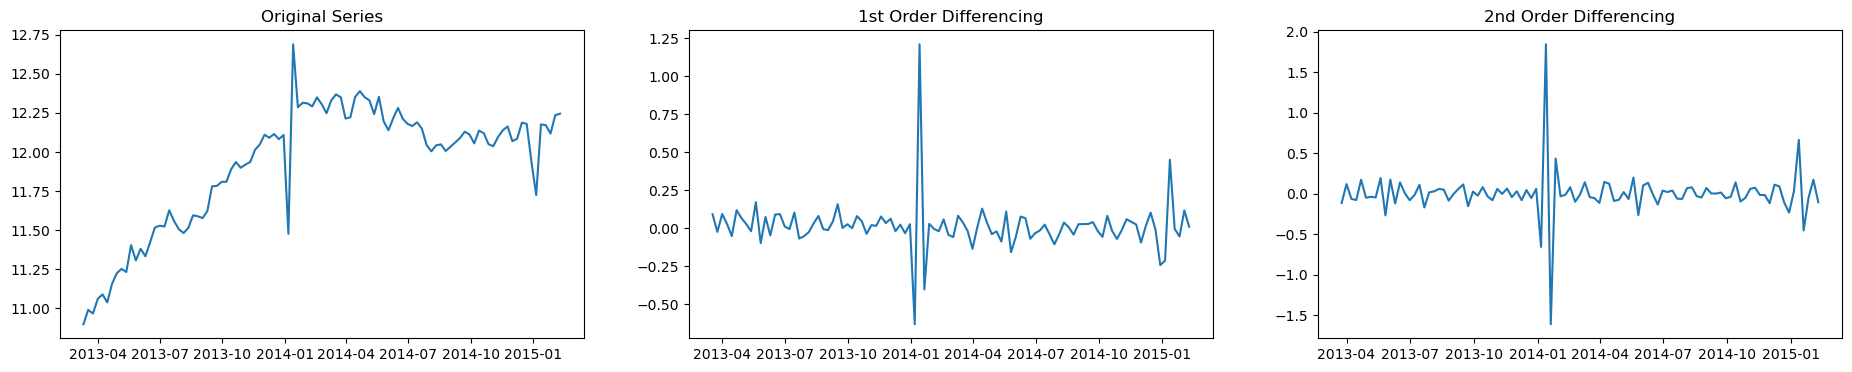

In [110]:
# Comparando e plotando a diferença entre os dados
# para verificar a estacionaridade

zero_diff = y2_train
first_order_diff = y2_train.diff(1)
second_order_diff = y2_train.diff(1).diff(1)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(23,4))
ax1.plot(zero_diff); ax1.set_title('Original Series')
ax2.plot(first_order_diff); ax2.set_title('1st Order Differencing')
ax3.plot(second_order_diff); ax3.set_title('2nd Order Differencing');

In [111]:
arima = pm.auto_arima(y2_train, scoring='mae',
                       start_p=0, max_p=5,
                       start_q=0, max_q=5,
                       trend='t',
                       seasonal=False,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-72.709, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-99.406, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-103.895, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-72.709, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-105.742, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-101.657, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-107.333, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-106.378, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-108.242, Time=0.30 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-98.969, Time=0.09 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-97.007, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-102.164, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-103.177, Time=0.12 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-99.759, Time=0.46 sec
 ARIMA(2,1,2)(0,0,0)[0]             : A

In [112]:
print(arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  101
Model:               SARIMAX(2, 1, 2)   Log Likelihood                  60.121
Date:                Sat, 24 Jun 2023   AIC                           -108.242
Time:                        19:03:42   BIC                            -92.611
Sample:                    03-11-2013   HQIC                          -101.916
                         - 02-09-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift       8.433e-06   3.52e-05      0.239      0.811   -6.06e-05    7.75e-05
ar.L1          0.8388      0.169      4.964      0.000       0.508       1.170
ar.L2          0.0545      0.186      0.293      0.7

In [113]:
# Salvando a previsão na variável 'arima_predict' para comparação do score dos modelos

arima_predict = arima.predict(n_periods=len(y2_test))

## Análise de Resíduos - Arima

In [114]:
arima_resid = arima.resid()

In [115]:
arima_resid = arima_resid[1:]

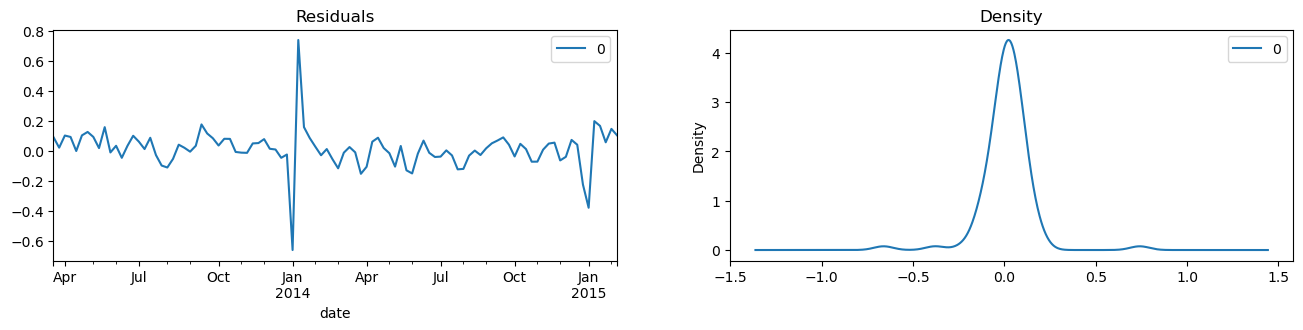

In [116]:
arima_resid = pd.DataFrame(arima_resid)

fig, ax = plt.subplots(1,2, figsize=(16,3))
arima_resid.plot(title="Residuals", ax=ax[0])
arima_resid.plot(kind='kde', title='Density', ax=ax[1]);

In [117]:
arima_resid.shape, arima_predict.shape

((100, 1), (40,))

1

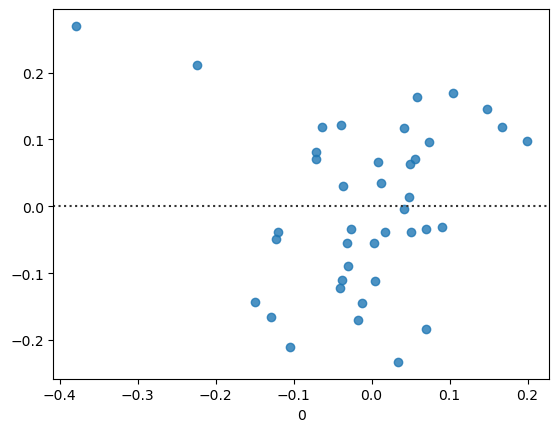

In [118]:
sns.residplot(arima_resid[60:], arima_predict);1

In [119]:
arima_resid[0].mean()

0.01287562862663501

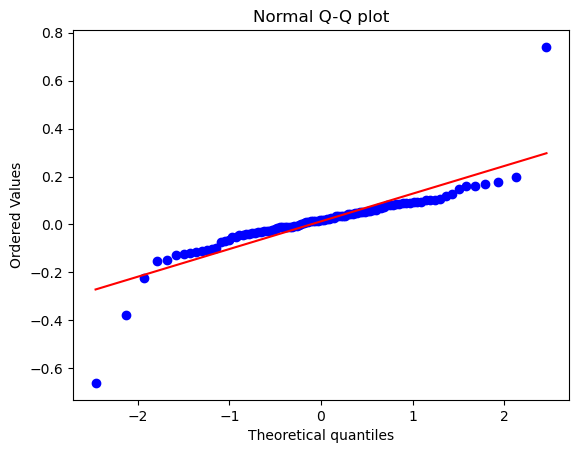

In [120]:
stats.probplot(arima_resid[0], dist='norm', plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [121]:
# Distribuição longe de ser gaussiana

lilliefors(arima_resid, dist='norm')

(0.15543752386489817, 0.0009999999999998899)

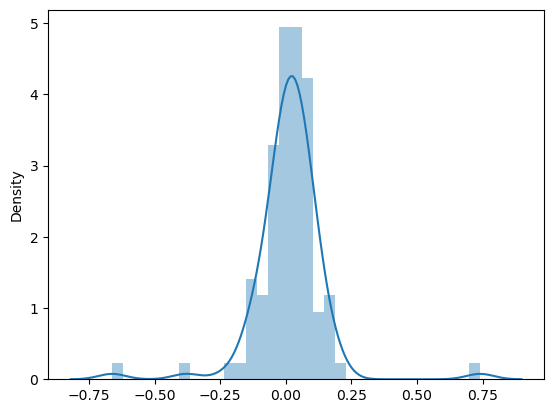

In [122]:
sns.distplot(arima_resid);

In [123]:
arima_resid[0].shape, X_train_scaled[1:].shape

((100,), (100, 6))

In [124]:
# Não temos evidências suficientes para dizer que a HETEROSCEDASTICIDADE é um problema no modelo ARIMA.

statistics, p_value, indexes = het_goldfeldquandt(arima_resid[0], X_train_scaled[1:])

print("Test statistics:", statistics)
print("Valor-P:", p_value)

Test statistics: 0.3134665176351411
Valor-P: 0.9999028982616601


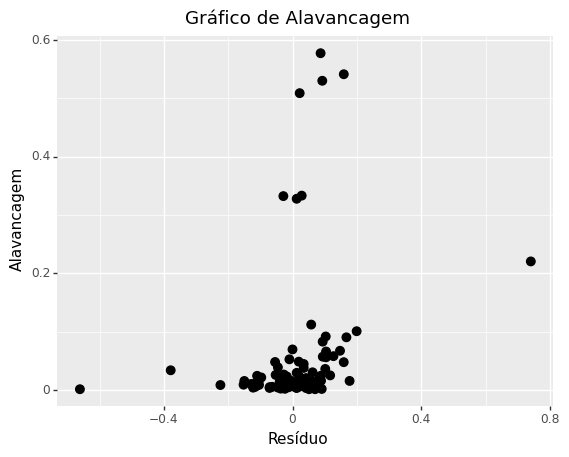

<ggplot: (42015223)>

In [125]:
(ggplot() +
 aes(x=arima_resid[0], y=leverage[1:]) +
 geom_point(size=3) +
 labs(x="Resíduo", y="Alavancagem", title="Gráfico de Alavancagem"))

In [126]:
# Verificando a porcentagem de erro do nosso modelo

arima_mape = mean_absolute_percentage_error(y2_test, arima_predict)

print('MAPE =', round(arima_mape, 2))

MAPE = 0.02


# Deep Learning

In [127]:
# Deep learning LSTM(Long Short Term Memory).
# batch_size=16 pega 16 amostras por teste.
# epochs=1000 quantidade de vezes que será treinado.
# Validation_split=0.3 separa 30% dos dados para o conjunto de validação.

deepLSTM = Sequential()
deepLSTM.add(LSTM(units=3, activation='relu', input_shape=(6,1)))
deepLSTM.add(layers.Dense(1, activation="linear"))

deepLSTM.compile(loss='mae', optimizer='adam')

es = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

deepLSTM.fit(X_train_scaled, y2_train,
          batch_size=16,
          epochs=1000,
          validation_split=0.3,
          callbacks=[es],
          verbose=1,
          validation_data=(X_test_scaled, y2_test))

Epoch 1/1000
7/7 [==============================] - 2s 47ms/step - loss: 11.9437 - val_loss: 12.2198
Epoch 2/1000
7/7 [==============================] - 0s 7ms/step - loss: 11.9299 - val_loss: 12.2127
Epoch 3/1000
7/7 [==============================] - 0s 7ms/step - loss: 11.9170 - val_loss: 12.2055
Epoch 4/1000
7/7 [==============================] - 0s 7ms/step - loss: 11.9038 - val_loss: 12.1983
Epoch 5/1000
7/7 [==============================] - 0s 7ms/step - loss: 11.8919 - val_loss: 12.1911
Epoch 6/1000
7/7 [==============================] - 0s 7ms/step - loss: 11.8796 - val_loss: 12.1837
Epoch 7/1000
7/7 [==============================] - 0s 7ms/step - loss: 11.8682 - val_loss: 12.1763
Epoch 8/1000
7/7 [==============================] - 0s 7ms/step - loss: 11.8565 - val_loss: 12.1687
Epoch 9/1000
7/7 [==============================] - 0s 7ms/step - loss: 11.8451 - val_loss: 12.1611
Epoch 10/1000
7/7 [==============================] - 0s 7ms/step - loss: 11.8336 - val_loss: 12.153

Epoch 83/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8460 - val_loss: 0.8433
Epoch 84/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.7831 - val_loss: 0.4658
Epoch 85/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.7061 - val_loss: 0.4348
Epoch 86/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.6226 - val_loss: 0.5242
Epoch 87/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.5883 - val_loss: 0.3605
Epoch 88/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.5257 - val_loss: 0.3523
Epoch 89/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.4794 - val_loss: 0.2671
Epoch 90/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.4320 - val_loss: 0.2739
Epoch 91/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.3946 - val_loss: 0.2555
Epoch 92/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.3625 - val_loss: 0.1722
Epoch 93/1

7/7 [==============================] - 0s 7ms/step - loss: 0.1380 - val_loss: 0.1235
Epoch 166/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.1268 - val_loss: 0.1151
Epoch 167/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1321 - val_loss: 0.0955
Epoch 168/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.1259 - val_loss: 0.0945
Epoch 169/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.1421 - val_loss: 0.0990
Epoch 170/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.1578 - val_loss: 0.1059
Epoch 171/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.1290 - val_loss: 0.0983
Epoch 172/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.1150 - val_loss: 0.0938
Epoch 173/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.1187 - val_loss: 0.1084
Epoch 174/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1254 - val_loss: 0.0987
Epoch 175/1000


In [128]:
X_test_scaled.shape, y2_test.shape

((40, 6), (40,))

In [129]:
# Prevendo os próximos seis meses e armazendando na variável 'deepLSTMpred'

deepLSTMpred = deepLSTM.predict(X_test_scaled)

2/2 [==============================] - 0s 3ms/step


In [130]:
# Previsão dos seis meses futuros

deepLSTMpred = deepLSTMpred[13:]
print(f'Previsão para seis meses: {deepLSTMpred}')

Previsão para seis meses: [[12.15051  ]
 [12.162546 ]
 [12.216179 ]
 [12.184274 ]
 [12.188569 ]
 [12.194352 ]
 [12.154541 ]
 [12.130354 ]
 [12.098526 ]
 [12.120673 ]
 [12.127936 ]
 [12.124439 ]
 [12.117298 ]
 [12.199882 ]
 [12.263585 ]
 [12.262517 ]
 [12.303922 ]
 [12.246706 ]
 [12.2196865]
 [12.217963 ]
 [12.2526   ]
 [12.210513 ]
 [12.233943 ]
 [12.206439 ]
 [12.259553 ]
 [12.307695 ]
 [12.264981 ]]


In [131]:
deepLSTM_mape = mean_absolute_percentage_error(y2_test[13:], deepLSTMpred)

print('MAPE =', round(deepLSTM_mape, 2))

MAPE = 0.01


## Análise de Resíduos - LSTM

In [132]:
y2_test.shape, deepLSTMpred.shape

((40,), (27, 1))

In [133]:
lstm_resid = y2_test[13:] - deepLSTMpred[0]

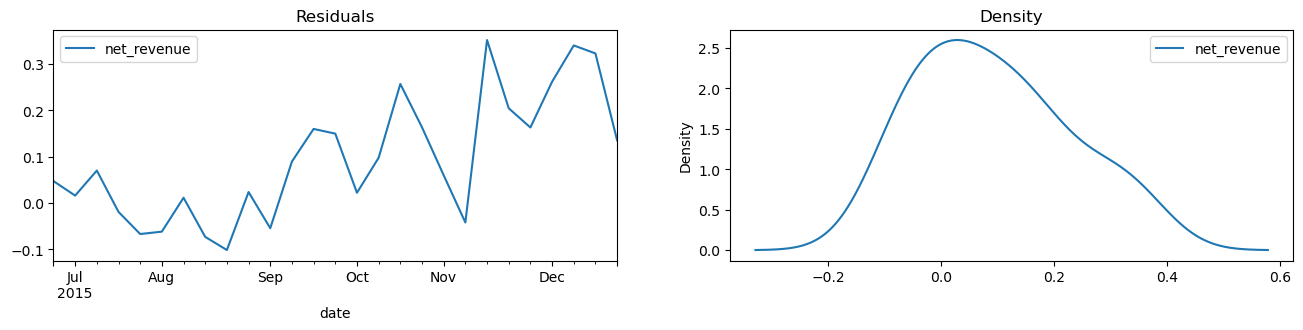

In [134]:
lstm_resid = pd.DataFrame(lstm_resid)

fig, ax = plt.subplots(1,2, figsize=(16,3))
lstm_resid.plot(title="Residuals", ax=ax[0])
lstm_resid.plot(kind='kde', title='Density', ax=ax[1]);

In [135]:
df_dashboard.shape, deepLSTMpred.shape, lstm_resid.shape

((155, 2), (27, 1), (27, 1))

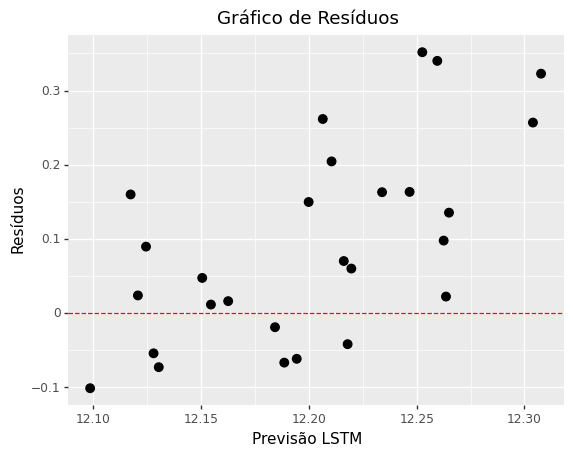

<ggplot: (56049472)>

In [136]:
(ggplot(df_dashboard[128:])
 + geom_point(aes(x=deepLSTMpred, y=lstm_resid), size=3)
 + geom_hline(yintercept=0, linetype='dashed', color='red')
 + labs(x='Previsão LSTM', y='Resíduos', title='Gráfico de Resíduos'))

In [137]:
# Não temos evidências suficientes para dizer que a HETEROSCEDASTICIDADE é um problema no modelo LSTM

statistics, p_value, indexes = het_goldfeldquandt(lstm_resid, X_test_scaled[13:])
print("Test statistics:", statistics)
print("Valor-P:", p_value)

Test statistics: 2.955176315588728
Valor-P: 0.07598641282499194


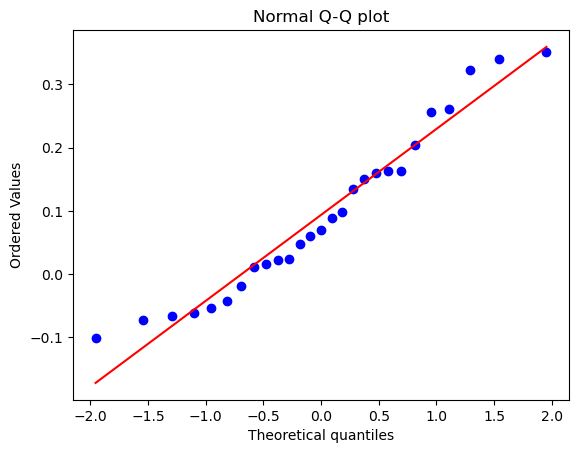

In [138]:
stats.probplot(lstm_resid['net_revenue'], dist='norm', plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [139]:
# Teste de normalidade atendido

from statsmodels.stats.diagnostic import lilliefors

lilliefors(lstm_resid, dist='norm')

(0.10758989507796518, 0.577163549706895)

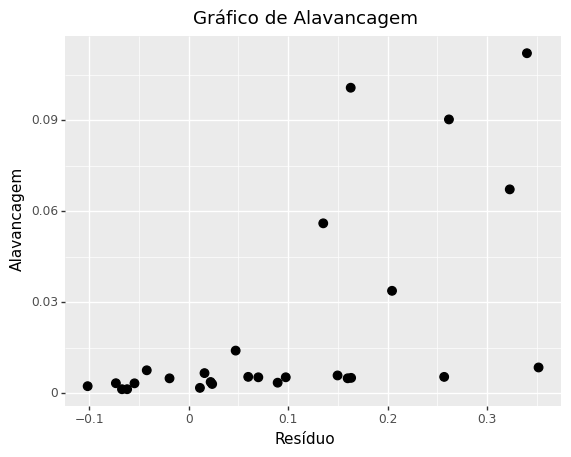

<ggplot: (60606645)>

In [140]:
(ggplot() +
 aes(x=lstm_resid, y=leverage[74:]) +
 geom_point(size=3) +
 labs(x="Resíduo", y="Alavancagem", title="Gráfico de Alavancagem"))

In [141]:
lstm_resid['net_revenue'].mean()

0.09354252613201434

In [142]:
# Problema de auto-correlação serial positiva no modelo LSTM

durbin_watson(lstm_resid, axis=0)

array([0.54745818])

# Random Forest

In [143]:
# Treinando Random Forest com 100 árvores de decisão

forest = RandomForestRegressor(n_estimators=1000, criterion='absolute_error')

In [144]:
forest.fit(X_train_scaled, y2_train)

RandomForestRegressor(criterion='absolute_error', n_estimators=1000)

In [145]:
forest_pred = forest.predict(X_test_scaled)

In [146]:
forest_mape = mean_absolute_percentage_error(y2_test[-28:], forest_pred[-28:])

print('MAPE =', round(forest_mape, 2))

MAPE = 0.01


In [147]:
print(f'Previsão para seis meses: {forest_pred}')

Previsão para seis meses: [12.28376752 12.29138417 12.27708379 12.29024918 12.12396931 12.13185396
 12.12497877 12.25110087 12.28034737 12.28048688 12.13201835 12.16414429
 12.10004382 12.05568248 12.15221    12.11143846 12.26459907 12.1151818
 12.12679634 12.06329723 12.09066171 12.03319233 12.04801562 12.13242639
 12.03562445 12.26692983 12.27791141 12.28661278 12.16707954 12.28362539
 12.15189872 12.29381454 12.20718198 12.12701023 12.16203561 12.27376318
 12.28288288 12.16547159 12.17116505 12.15732807]


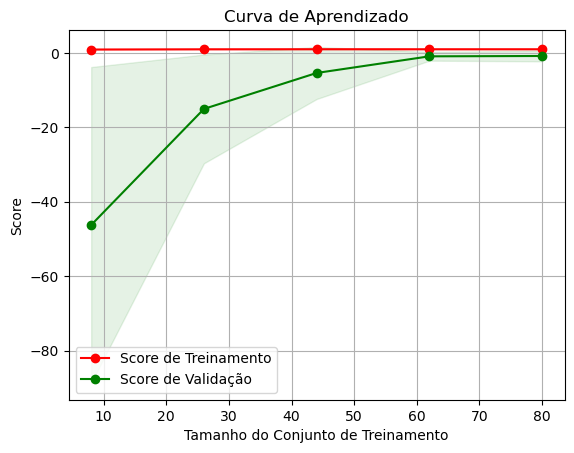

In [148]:
X, y = X_train_scaled, y2_train

# Definir o modelo de aprendizado de máquina
model = RandomForestRegressor()

# Gerar as curvas de aprendizado
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# Calcular as médias e desvios padrão dos scores de treinamento e validação
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotar as curvas de aprendizado
plt.figure()
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Score de Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Score de Validação")
plt.legend(loc="best")
plt.show()

## Análise de Resíduos - Random Forest

In [149]:
residuals_forest = y2_test - forest_pred

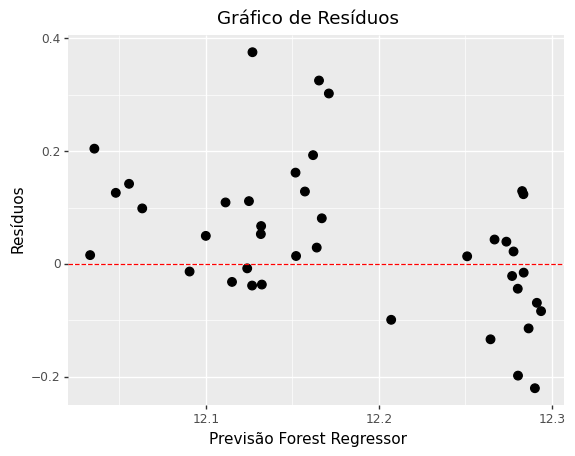

<ggplot: (42923707)>

In [150]:
(ggplot(df_dashboard[115:])
 + geom_point(aes(x=forest_pred, y=residuals_forest), size=3)
 + geom_hline(yintercept=0, linetype='dashed', color='red')
 + labs(x='Previsão Forest Regressor', y='Resíduos', title='Gráfico de Resíduos'))

In [151]:
# Não temos evidências suficientes para dizer que a HETEROSCEDASTICIDADE é um problema no modelo Random Forest

statistics, p_value, indexes = het_goldfeldquandt(residuals_forest, X_test_scaled)
print("Test statistics:", statistics)
print("Valor-P:", p_value)

Test statistics: 1.8647502423341986
Valor-P: 0.12792609763305315


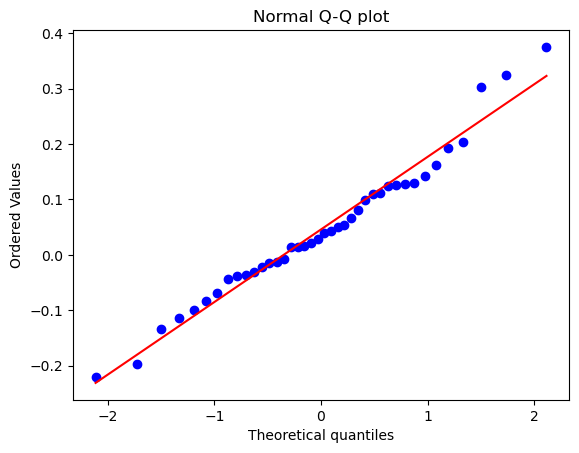

In [152]:
stats.probplot(residuals_forest, dist='norm', plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [153]:
# Teste de normalidade atendido

lilliefors(residuals_forest, dist='norm')

(0.08357033043523465, 0.6782452738212069)

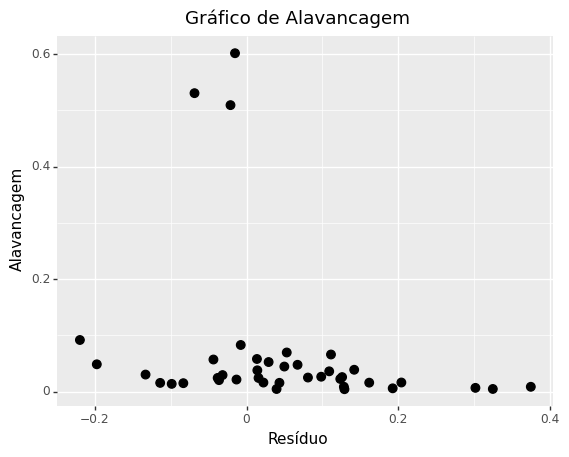

<ggplot: (52083550)>

In [154]:
(ggplot() +
 aes(x=residuals_forest, y=leverage[:40]) +
 geom_point(size=3) +
 labs(x="Resíduo", y="Alavancagem", title="Gráfico de Alavancagem"))

In [155]:
residuals_forest.mean()

0.04589572099606785

In [156]:
# Pouca correlação serial positiva

durbin_watson(residuals_forest, axis=0)

1.291291877738843

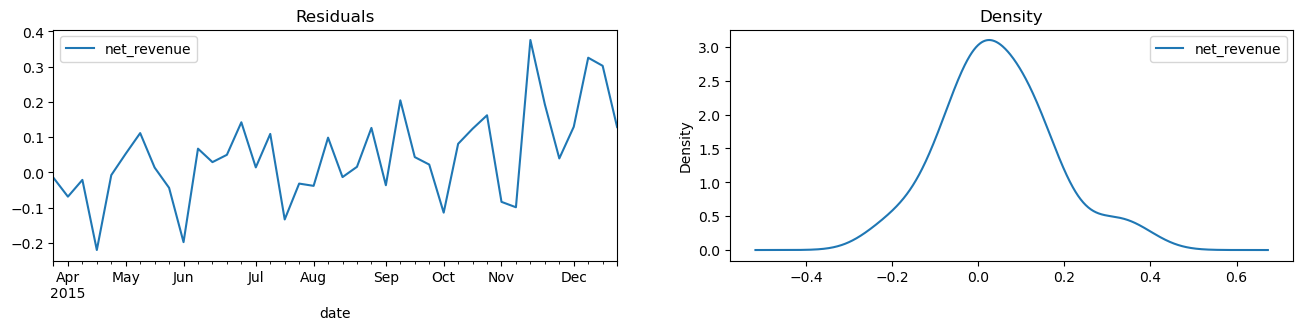

In [157]:
residuals_forest = pd.DataFrame(residuals_forest)

fig, ax = plt.subplots(1,2, figsize=(16,3))
residuals_forest.plot(title="Residuals", ax=ax[0])
residuals_forest.plot(kind='kde', title='Density', ax=ax[1]);

# XGBRegressor

In [158]:
# Montagem do modelo XGBoost preditivo

xgb_reg = XGBRegressor(max_depth=100, n_estimators=1000, learning_rate=0.1)

xgb_reg.fit(X_train_scaled, y2_train,
            eval_metric='mape',
            #Avalia a perda em cada iteração
            eval_set=[(X_train_scaled, y2_train), (X_test_scaled, y2_test)],  
            #Para de iterar quando a perda de avaliação aumenta 30 vezes seguidas
            early_stopping_rounds=30
            )

[0]	validation_0-mape:0.86303	validation_1-mape:0.86662
[1]	validation_0-mape:0.77746	validation_1-mape:0.78330
[2]	validation_0-mape:0.70036	validation_1-mape:0.70823
[3]	validation_0-mape:0.63090	validation_1-mape:0.64059
[4]	validation_0-mape:0.56832	validation_1-mape:0.57965
[5]	validation_0-mape:0.51193	validation_1-mape:0.52475
[6]	validation_0-mape:0.46113	validation_1-mape:0.47528
[7]	validation_0-mape:0.41535	validation_1-mape:0.43070
[8]	validation_0-mape:0.37411	validation_1-mape:0.39055
[9]	validation_0-mape:0.33696	validation_1-mape:0.35437
[10]	validation_0-mape:0.30348	validation_1-mape:0.32177
[11]	validation_0-mape:0.27364	validation_1-mape:0.29127
[12]	validation_0-mape:0.24676	validation_1-mape:0.26329
[13]	validation_0-mape:0.22249	validation_1-mape:0.23859
[14]	validation_0-mape:0.20063	validation_1-mape:0.21577
[15]	validation_0-mape:0.18088	validation_1-mape:0.19581
[16]	validation_0-mape:0.16310	validation_1-mape:0.17723
[17]	validation_0-mape:0.14707	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=100, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [159]:
# Montando a previsão para seis meses futuros

xgb_pred = xgb_reg.predict(X_test_scaled)

In [160]:
XGBRegressor_mape = mean_absolute_percentage_error(y2_test, xgb_pred)

In [161]:
# Porcentagem de erro do XGBOOST arredondado para duas casas decimais

xgb_mape = mean_absolute_percentage_error(y2_test[-28:], xgb_pred[-28:])

print('MAPE =', round(xgb_mape, 2))

MAPE = 0.01


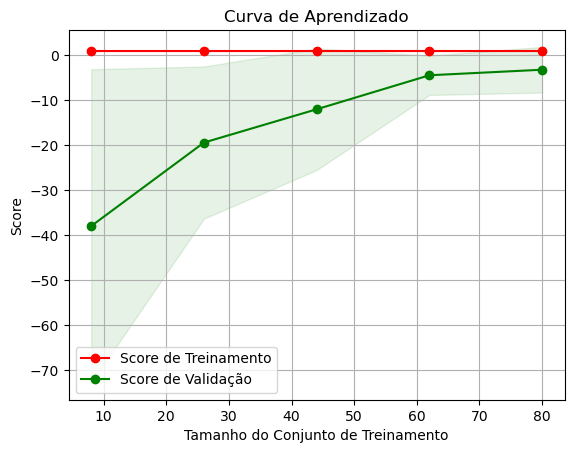

In [162]:
X, y = X_train_scaled, y2_train

# Definir o modelo de aprendizado de máquina
model = XGBRegressor()

# Gerar as curvas de aprendizado
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# Calcular as médias e desvios padrão dos scores de treinamento e validação
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotar as curvas de aprendizado
plt.figure()
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Score de Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Score de Validação")
plt.legend(loc="best")
plt.show()

## Análise de Resíduos - XGBoost Regressor

In [163]:
residuals_xgb = y2_test - xgb_pred

In [164]:
df_dashboard.shape, xgb_pred.shape, residuals_xgb.shape, X2_train.shape, y2_train.shape, df.shape

((155, 2), (40,), (40,), (101, 6), (101, 1), (715875, 8))

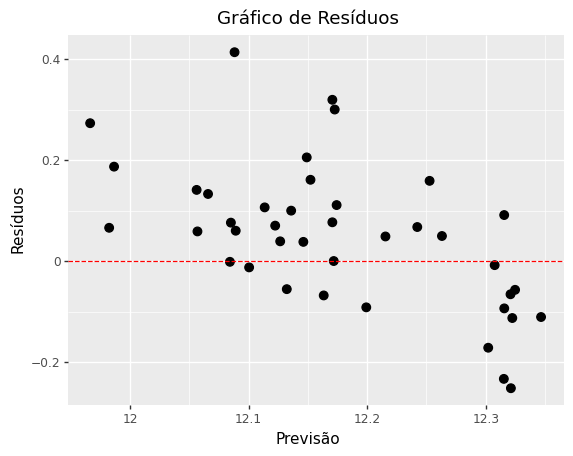

<ggplot: (41976456)>

In [165]:
(ggplot(df_dashboard[115:])
 + geom_point(aes(x=xgb_pred, y=residuals_xgb), size=3)
 + geom_hline(yintercept=0, linetype='dashed', color='red')
 + labs(x='Previsão', y='Resíduos', title='Gráfico de Resíduos'))

In [166]:
# Pouca correlação positiva

durbin_watson(residuals_xgb, axis=0)

1.3582115225937899

In [167]:
# Não há evidências suficientes para dizer que a HETEROSCEDASTICIDADE é um problema no modelo XGBoost Regressor

statistics, p_value, indexes = het_goldfeldquandt(residuals_xgb, X_test_scaled)

print("Test statistics:", statistics)
print("Value-P:", p_value)

Test statistics: 1.7336889713803931
Value-P: 0.15743267931728314


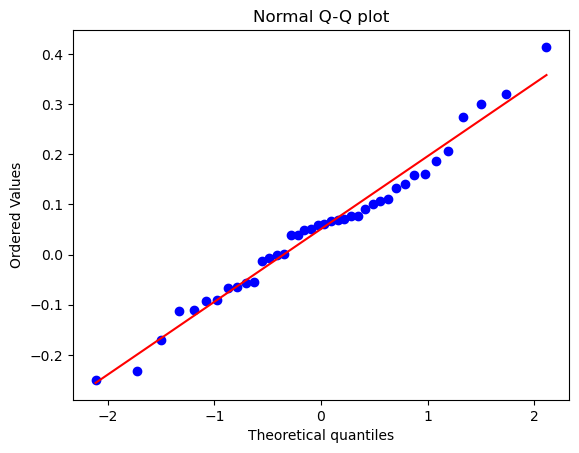

In [168]:
stats.probplot(residuals_xgb, dist='norm', plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [169]:
# Exigência de normalidade atendida

lilliefors(residuals_xgb, dist='norm')

(0.09025289252545332, 0.5569985425951127)

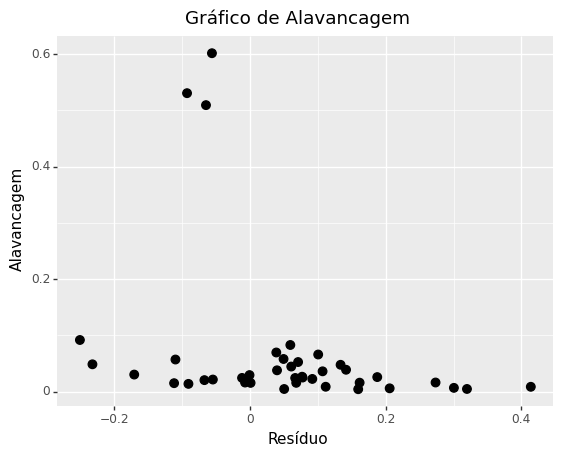

<ggplot: (52418810)>

In [170]:
(ggplot() +
 aes(x=residuals_xgb, y=leverage[:40]) +
 geom_point(size=3) +
 labs(x="Resíduo", y="Alavancagem", title="Gráfico de Alavancagem"))

# Prophet

In [171]:
# Modelando para o formato específico requerido pelo prophet

df_prophet = X2_train['t - 1'].reset_index().rename(columns={'date': 'ds', 't - 1':'y'})
df_prophet

,ds,y
0,2013-03-11,10.812915
1,2013-03-18,10.899144
2,2013-03-25,10.991511
3,2013-04-01,10.967681
4,2013-04-08,11.061516
...,...,...
96,2015-01-12,11.724935
97,2015-01-19,12.175990
98,2015-01-26,12.171486
99,2015-02-02,12.117465


In [172]:
# Separando os dados em treinamento e teste.

train = df_prophet.iloc[:80]
test = df_prophet.iloc[80:]

# Modelo preditivo prophet com finais de semana e feriados do Brasil

prophet = Prophet()

prophet.add_country_holidays(country_name='BR')

prophet.fit(train)

19:04:06 - cmdstanpy - INFO - Chain [1] start processing
19:04:06 - cmdstanpy - INFO - Chain [1] done processing


In [173]:
forecast_pred = prophet.predict(test)
forecast_pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Ano novo,Ano novo_lower,Ano novo_upper,Carnaval,...,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-22,12.009753,11.869887,12.149527,12.009165,12.010165,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.009753
1,2014-09-29,11.995366,11.845747,12.142766,11.993267,11.996997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.995366
2,2014-10-06,11.980980,11.831415,12.113934,11.976638,11.984809,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.980980
3,2014-10-13,11.966593,11.836525,12.121155,11.959414,11.973174,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.966593
4,2014-10-20,11.952207,11.806481,12.098639,11.941777,11.962083,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.952207


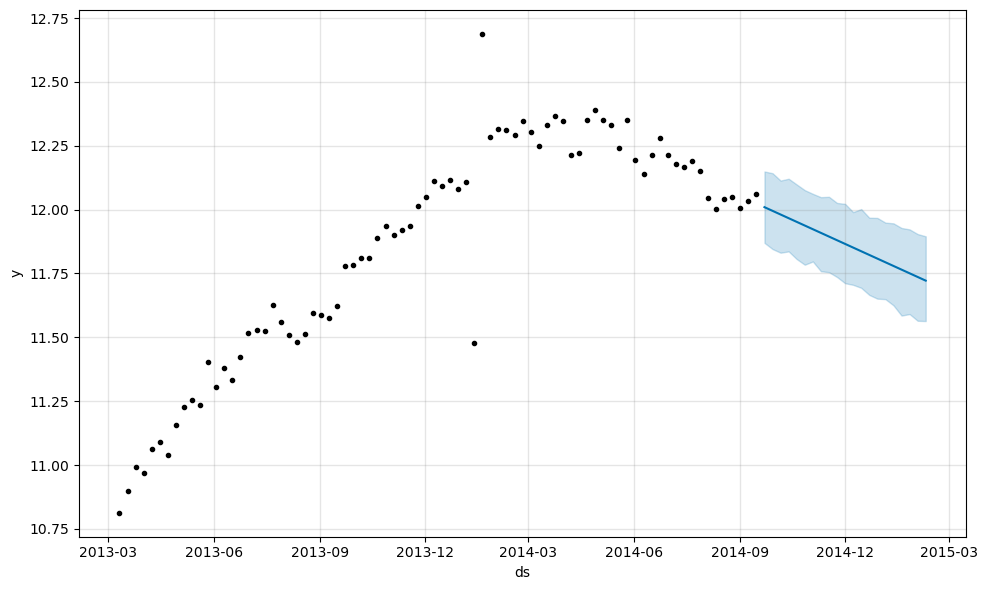

In [174]:
prophet.plot(forecast_pred);

In [175]:
future = prophet.make_future_dataframe(periods=71, freq='W', include_history=False)

In [176]:
forecast_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Ano novo,Ano novo_lower,Ano novo_upper,Carnaval,...,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
16,2015-01-12,11.779569,11.625316,11.946437,11.708821,11.850280,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.779569
17,2015-01-19,11.765182,11.585142,11.928301,11.687036,11.844038,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.765182
18,2015-01-26,11.750796,11.591115,11.922711,11.666460,11.837316,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.750796
19,2015-02-02,11.736409,11.564854,11.904536,11.645657,11.830504,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.736409
20,2015-02-09,11.722022,11.563723,11.895576,11.623432,11.821229,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.722022


In [177]:
future.tail()

,ds
66,2015-12-27
67,2016-01-03
68,2016-01-10
69,2016-01-17
70,2016-01-24


In [178]:
prophetpred = prophet.predict(future[-24:])

In [179]:
prophetpred = prophetpred['yhat']

In [180]:
# Previsão de receita para os próximos seis meses

prophetpred

0     11.335642
1     11.321255
2     11.306869
3     11.292482
4     11.278096
5     11.263709
6     11.249323
7     11.234936
8     11.220550
9     11.206163
10    11.191776
11    11.177390
12    11.163003
13    11.148617
14    11.134230
15    11.119844
16    11.105457
17    11.091071
18    11.076684
19    11.062298
20    11.047911
21    11.033525
22    11.019138
23    11.004752
Name: yhat, dtype: float64

In [181]:
prophetpred_mape = mean_absolute_percentage_error(y2_test[-24:], prophetpred)

print('MAPE =', round(prophetpred_mape, 2))

MAPE = 0.09


In [182]:
six = cross_validation(prophet, horizon='24 W', initial=0)

  0%|          | 0/5 [00:00<?, ?it/s]

19:04:08 - cmdstanpy - INFO - Chain [1] start processing
19:04:08 - cmdstanpy - INFO - Chain [1] done processing
19:04:08 - cmdstanpy - INFO - Chain [1] start processing
19:04:08 - cmdstanpy - INFO - Chain [1] done processing
19:04:09 - cmdstanpy - INFO - Chain [1] start processing
19:04:09 - cmdstanpy - INFO - Chain [1] done processing
19:04:10 - cmdstanpy - INFO - Chain [1] start processing
19:04:10 - cmdstanpy - INFO - Chain [1] done processing
19:04:11 - cmdstanpy - INFO - Chain [1] start processing
19:04:11 - cmdstanpy - INFO - Chain [1] done processing


In [183]:
# Porcentagem de erro para cada semana

performance_metrics(six)['mape']

0     0.013851
1     0.011403
2     0.010452
3     0.010505
4     0.011704
5     0.012357
6     0.014001
7     0.016001
8     0.017033
9     0.017973
10    0.024535
11    0.027271
12    0.025546
13    0.023654
14    0.024500
15    0.027210
16    0.030754
17    0.032513
18    0.034297
19    0.036805
20    0.038682
21    0.039663
Name: mape, dtype: float64

# Comparativo

In [184]:
# Construindo tabela para comparação de score MAPE

score = {'Model': ['Ridge Regression', 'Huber Regression', 'Arima', 'Deep Learning LSTM', 'Random Forest', 'XGBRegressor', 'Prophet'],
         'Score Mape': [ridge_mape ,huber_mape, arima_mape, deepLSTM_mape, forest_mape, xgb_mape, prophetpred_mape]}
          

In [185]:
df_score = pd.DataFrame(score)

In [186]:
# Organizando o Score por ordem crescente e arredondando para duas casas decimais

df_score = round(df_score.sort_values('Score Mape'), 2)

In [187]:
# Comparativo do score dos modelos com mean absolute Percentage error

df_score

,Model,Score Mape
0,Ridge Regression,0.01
1,Huber Regression,0.01
3,Deep Learning LSTM,0.01
4,Random Forest,0.01
5,XGBRegressor,0.01
2,Arima,0.02
6,Prophet,0.09


In [188]:
# Ranking de desempenho dos modelos:

# 1o - Arima - observação: Na análise de resíduos foi identificada uma distribuição não Gaussiana
# 2o - Random Forest - observação: Na análise de resíduos foi identificado pouca correlação positiva
# 3o - XGBRegressor - observação: Na análise de resíduos foi identificado pouca correlação positiva

# Random Forest leva vantagem sobre o XGBRegressor na curva de aprendizado.
# Converge para o melhor desempenho mais rápido e pontuação um pouco mais alta.